In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# all columns are numerical (categorical columns have been converted)
df = pd.read_csv('df_adv_ontime_late.csv')
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [3]:
df = df.drop(columns=[
    'Late_delivery_risk'
], axis=1)

In [4]:
df_obj = df.select_dtypes(include='object')
df_obj.drop(columns=['Delivery Status'], axis=1, inplace=True)

In [5]:
#one hot encoder
def onehotencoder(col):
    
    ohe = OneHotEncoder()
    ohe_array = ohe.fit_transform((pd.DataFrame(col))).toarray()

    feature_labels = np.array(ohe.categories_).ravel()


    df_obj = pd.DataFrame(ohe_array, columns=feature_labels)
    
    return df_obj

In [6]:
df_ohe = pd.DataFrame()
for c in df_obj.columns:
    one_hot = onehotencoder(df_obj[c])
    df_ohe = pd.concat([df_ohe, one_hot], axis=1) 

In [7]:
df_cont_var = df.select_dtypes(exclude='object')

In [8]:
df_ohe = pd.concat([df_cont_var, df_ohe], axis=1)

In [9]:
df_ohe = pd.concat([df_ohe, df['Delivery Status'] ], axis=1)

In [10]:
df=df_ohe

In [11]:
# y variable values set equal to label encode the dataframes column being used for y
le = LabelEncoder()
y = le.fit_transform(df['Delivery Status'])

In [12]:
# x variable
X = df.drop(columns=['Delivery Status'], axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2)

### Random Forest Classifier Model

In [14]:
# scaling data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [15]:
scaler_x_train = scaler.transform(X_train)
scaler_x_test = scaler.transform(X_test)

In [16]:
rfc = RandomForestClassifier()
rfc.fit(scaler_x_train, y_train)
rfc_pred_train = rfc.predict(scaler_x_train)

### Test Model

In [17]:
rfc_pred_test = rfc.predict(scaler_x_test)

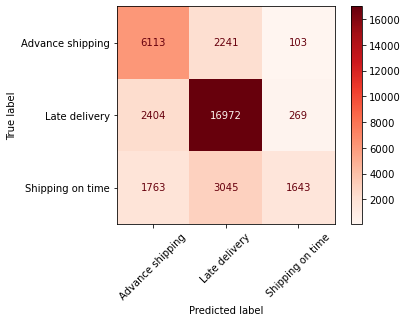

In [18]:
plot_confusion_matrix(rfc, scaler_x_test, y_test,
                      cmap=plt.cm.Reds)

plt.xticks(ticks=range(0,len(le.classes_)),labels=le.classes_, rotation=45)
plt.yticks(ticks=range(0,len(le.classes_)),labels=le.classes_)

plt.show()

In [19]:
print(classification_report(y_test, rfc_pred_test, target_names=le.classes_))

                  precision    recall  f1-score   support

Advance shipping       0.59      0.72      0.65      8457
   Late delivery       0.76      0.86      0.81     19645
Shipping on time       0.82      0.25      0.39      6451

        accuracy                           0.72     34553
       macro avg       0.72      0.61      0.62     34553
    weighted avg       0.73      0.72      0.69     34553



In [20]:
#.71 before corr change
# did not change

In [21]:
#.72 before delivery status change
#.77 after delivery status change